## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.getcwd()

'c:\\Users\\fre_f\\PythonProjects\\Bacteriological\\Code\\ded'

In [3]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [4]:
df = pd.read_csv('./data/Genus_DEDorNot.csv')

In [5]:
df.head()

,Index,Patient=1,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,...,Intrasporangium,sp10518,sp44151,Limnobacter,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.092816,0.001058,0.042075,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,65,0,0,NaN,NaN
1,P2,1,0.698862,0.001191,0.004366,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,67,0,0,31.25,17.0
2,P3,1,0.034017,0.259365,0.003640,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,33,0,0,33.30,16.0
3,P4,1,0.029042,0.177362,0.015877,0.0,0.0,0.127216,0.0,0.000000,...,0.0,0.0,0.0,0,1,66,0,0,93.75,21.0
4,P5,1,0.307662,0.164086,0.050351,0.0,0.0,0.000331,0.0,0.000463,...,0.0,0.0,0.0,0,0,69,0,0,6.25,7.0


In [6]:
df.iloc[:,2:]

,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,Finegoldia,Acinetobacter,...,Intrasporangium,sp10518,sp44151,Limnobacter,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,0.092816,0.001058,0.042075,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006020,...,0.0,0.0,0.0,0,1,65,0,0,NaN,NaN
1,0.698862,0.001191,0.004366,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,67,0,0,31.25,17.0
2,0.034017,0.259365,0.003640,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,33,0,0,33.30,16.0
3,0.029042,0.177362,0.015877,0.000000,0.000000,0.127216,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,66,0,0,93.75,21.0
4,0.307662,0.164086,0.050351,0.000000,0.000000,0.000331,0.000000,0.000463,0.0,0.002183,...,0.0,0.0,0.0,0,0,69,0,0,6.25,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.015879,0.130277,0.522496,0.000000,0.001456,0.000000,0.000595,0.042676,0.0,0.055313,...,0.0,0.0,0.0,0,1,50,1,0,14.50,9.0
87,0.456597,0.420537,0.009461,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004830,...,0.0,0.0,0.0,0,1,60,0,0,0.00,2.0
88,0.158295,0.048375,0.097082,0.631328,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,51,1,1,14.50,3.0
89,0.565824,0.358825,0.053255,0.000000,0.000000,0.000000,0.000000,0.002117,0.0,0.001522,...,0.0,0.0,0.0,0,1,48,0,0,0.00,0.0


In [7]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [8]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 604)
(19, 604)
(72,)
(19,)


In [11]:
def xgbmetrics():
    y_pred = clfxgb.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '0']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

In [12]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '0']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train, predict and explain

### XGBoost

In [13]:
clfxgb = XGBClassifier().fit(X_train, y_train)
clfxgb.predict(X_test)

xgbmetrics()

Balanced accuracy: 0.9642857142857143
MCC: 0.879664438186246
F1: 0.936026936026936
Confusion matrix: 
[[ 5  0]
 [ 1 13]]
Classification report: 
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           0       1.00      0.93      0.96        14

    accuracy                           0.95        19
   macro avg       0.92      0.96      0.94        19
weighted avg       0.96      0.95      0.95        19



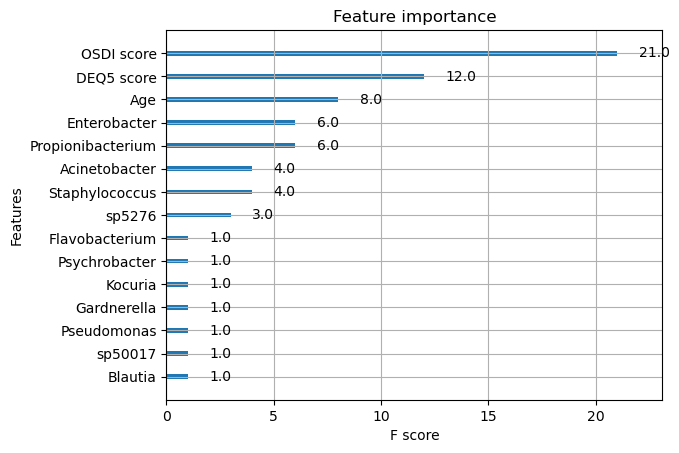

In [14]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

[17:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


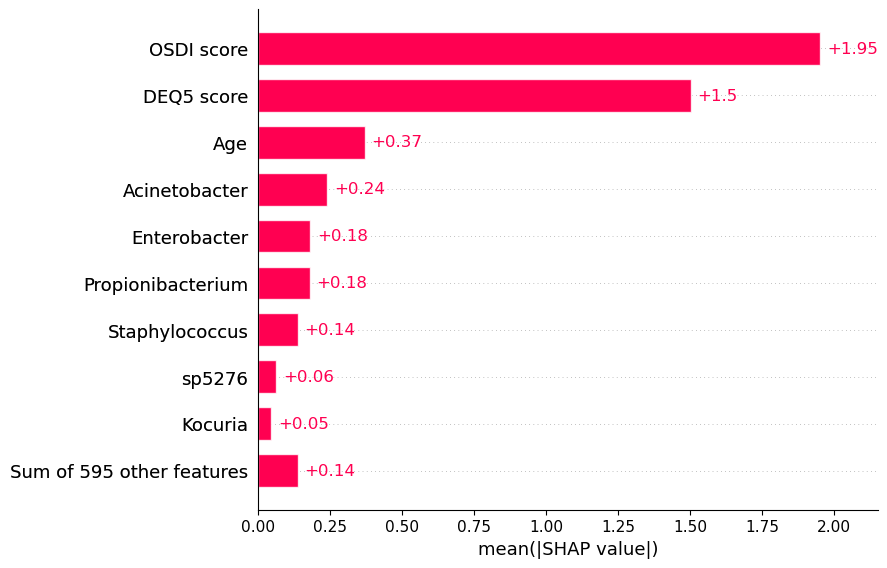

In [15]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X_test)

# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb)

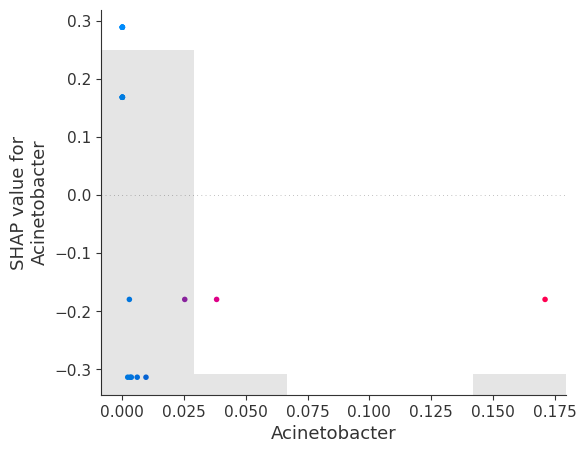

In [16]:
# Plot the SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to visualize
feature_name = 'Acinetobacter'  
shap.plots.scatter(shap_valuesxgb[:, feature_name], color=shap_valuesxgb)

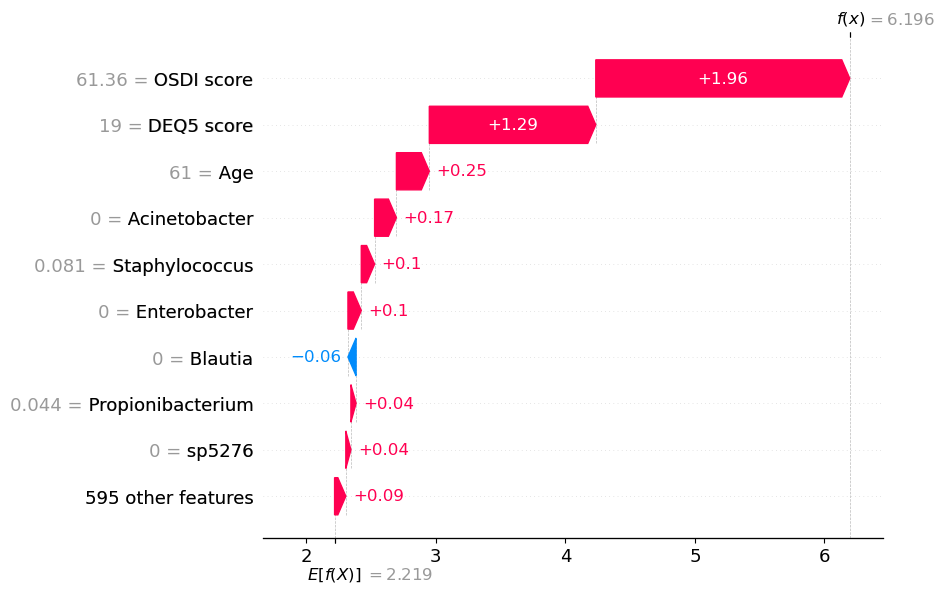

In [17]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

### LightGBM

In [18]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 47, number of negative: 25
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.652778 -> initscore=0.631272
[LightGBM] [Info] Start training from score 0.631272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

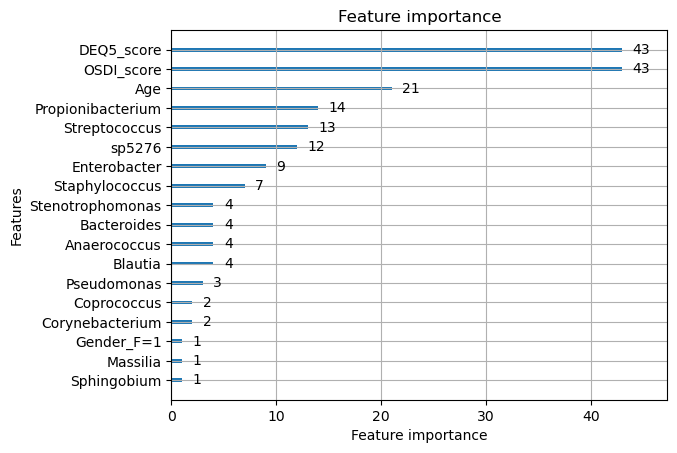

In [19]:
lgb.plot_importance(clflgbm)

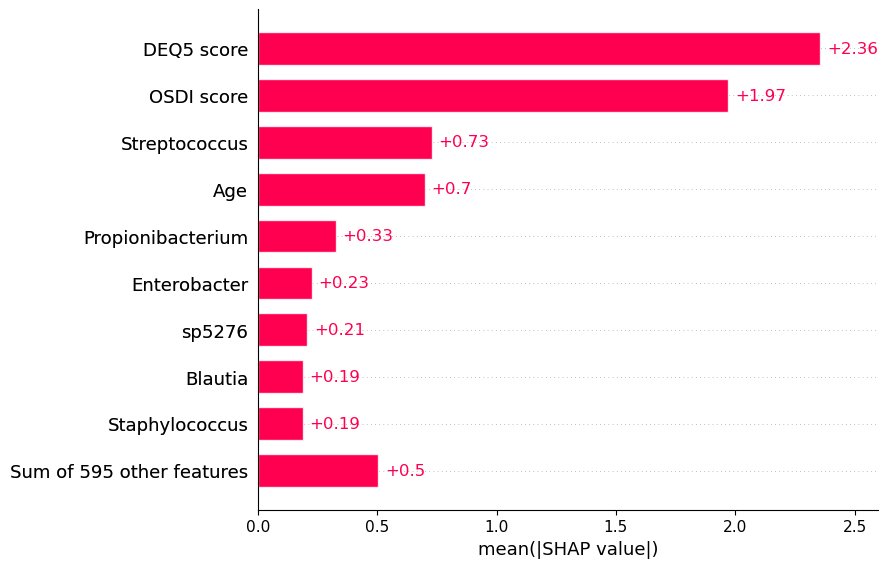

In [20]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X_test)

# Compute SHAP values for the dataset

shap_valueslgbm = explainerlgbm(X_test)

# Plot the SHAP summary plot

shap.plots.bar(shap_valueslgbm)

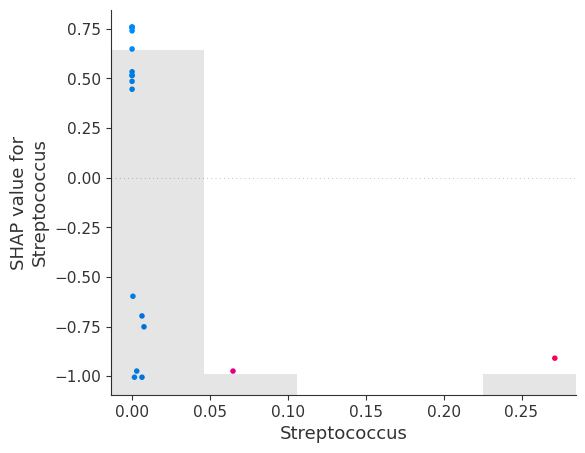

In [21]:
# Plot the SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to visualize
feature_name = 'Streptococcus'  
shap.plots.scatter(shap_valueslgbm[:, feature_name], color=shap_valueslgbm)

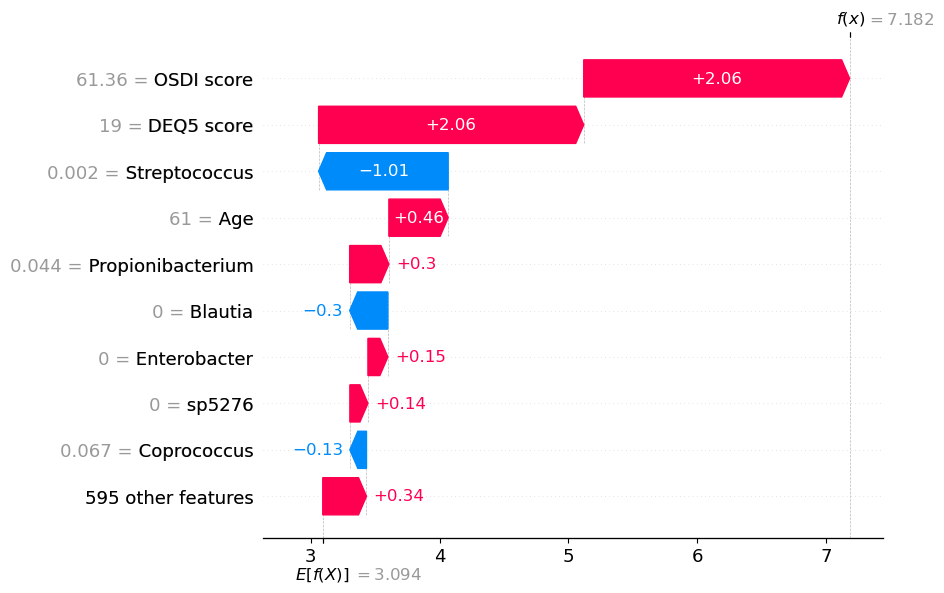

In [22]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valueslgbm[instance_index])